In [ ]:
np.load("/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02/used_init_probe.npy").shape

In [ ]:
import numpy as np
from sscPimega import pi540D
from sscCdi import read_hdf5, Geometry

input_dict = {}
input_dict["temporary_output"] = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02/temp"
input_dict["GPUs"] = [0,1,2]
input_dict["DP_center"] = [1418,1383]
input_dict["detector_ROI_radius"] = 1280
input_dict["flatfield"] = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/images/flat.hdf5"
input_dict["mask"] = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/images/mask.hdf5"
input_dict["detector_distance"] = 14.000035595703125
input_dict["suspect_border_pixels"] = 3 
input_dict["fill_blanks"] = False

geometry, params = Geometry(input_dict["detector_distance"]*1000,susp=input_dict["suspect_border_pixels"],fill=input_dict["fill_blanks"]) # distance in milimeters

dic = {}
# dic['path']     = ["/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/scans/0000_SS03112022_02_001.hdf5"]
dic['path'] = ["/home/ABTLUS/yuri.tonin/test/ex.py"]
dic['outpath']  = "/home/ABTLUS/yuri.tonin/test/" #input_dict["temporary_output"]
dic['order']    = "yx" 
dic['rank']     = "ztyx" # order of axis
dic['dataset']  = "entry/data/data"
dic['gpus']     = input_dict["GPUs"]
dic['init']     = 0
dic['final']    = -1 # -1 to use all DPs
dic['saving']   = 1  # save or not
dic['timing']   = 0  # print timers 
dic['blocksize']= 10
dic['center']   = (input_dict["DP_center"][1],input_dict["DP_center"][0]) # [1400,1400]
dic['roi'] = input_dict["detector_ROI_radius"] # integer
if 1: 
    print(dic)
    dic['flat'] = np.ones([3072, 3072]) 
    dic['mask'] = np.zeros([3072, 3072])
else:
    dic['flat'] = read_hdf5(input_dict["flatfield"])[()][0, 0, :, :] # np.ones([3072, 3072]) #
    dic['mask'] = read_hdf5(input_dict["mask"])[()][0, 0, :, :] # np.zeros([3072, 3072])
dic['empty']    = np.zeros_like(dic['flat']) # OBSOLETE! empty is not used anymore;        dic['daxpy']    = [0,np.zeros([3072,3072])] 
dic['daxpy']    = [0,np.zeros([3072,3072])] 
dic['geometry'] = geometry

dic['path'] = dic['path'][0]
restored_data_info = pi540D.ioSet_Backward540D( dic )
    
DPs = pi540D.ioGetM_Backward540D( dic, restored_data_info, 0)


In [ ]:
import h5py
path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/images/mask.hdf5"
file = h5py.File(path,'r')
mask = file['entry/data/data'][0][0]

In [ ]:
path_empty = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/images/empty.hdf5"
file = h5py.File(path_empty,'r')
empty = np.asarray(file['entry/data/data'])[0][0]
empty.shape

In [ ]:
path_flat = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/images/flat.hdf5"
file = h5py.File(path_flat,'r')
flat = np.asarray(file['entry/data/data'])[0][0]
flat.shape

In [ ]:
path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02/2023-04-12-11h31m_SS03112022_02.hdf5"
file = h5py.File(path,'r')
DP = np.asarray(file['log/raw_DP_avg'])
print(DP.shape)
DP2 = DP.copy()

In [ ]:
path_data = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/data/ptycho2d/SS03112022_02/scans/0000_SS03112022_02_001.hdf5"
file = h5py.File(path_data,'r')
data = np.asarray(file['entry/data/data'])[0]
print(data.shape)

In [28]:
path1 = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02/used_DPs_new.npy"
path2 = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02/best/used_DPs.npy"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib.colors import LogNorm
from sscPimega import opt540D, pi540D
new = np.load(path1)
old = np.load(path2)
print(new.shape, old.shape)
N = 0
# for i in range(new.shape[0]):
    # print(np.max(new[i]))
new = new[N]
old = old[N]
print(new.shape,old.shape)
diff = new - old
print(np.max(new),np.max(old))

(624, 2560, 2560) (624, 2560, 2560)
(2560, 2560) (2560, 2560)
30721.613 30721.613


In [33]:
import h5py

path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/recons/SS03112022_02/2023-04-14-14h41m_SS03112022_02.hdf5"
data = h5py.File(path, "r")

AttributeError: module 'os' has no attribute 'isdir'

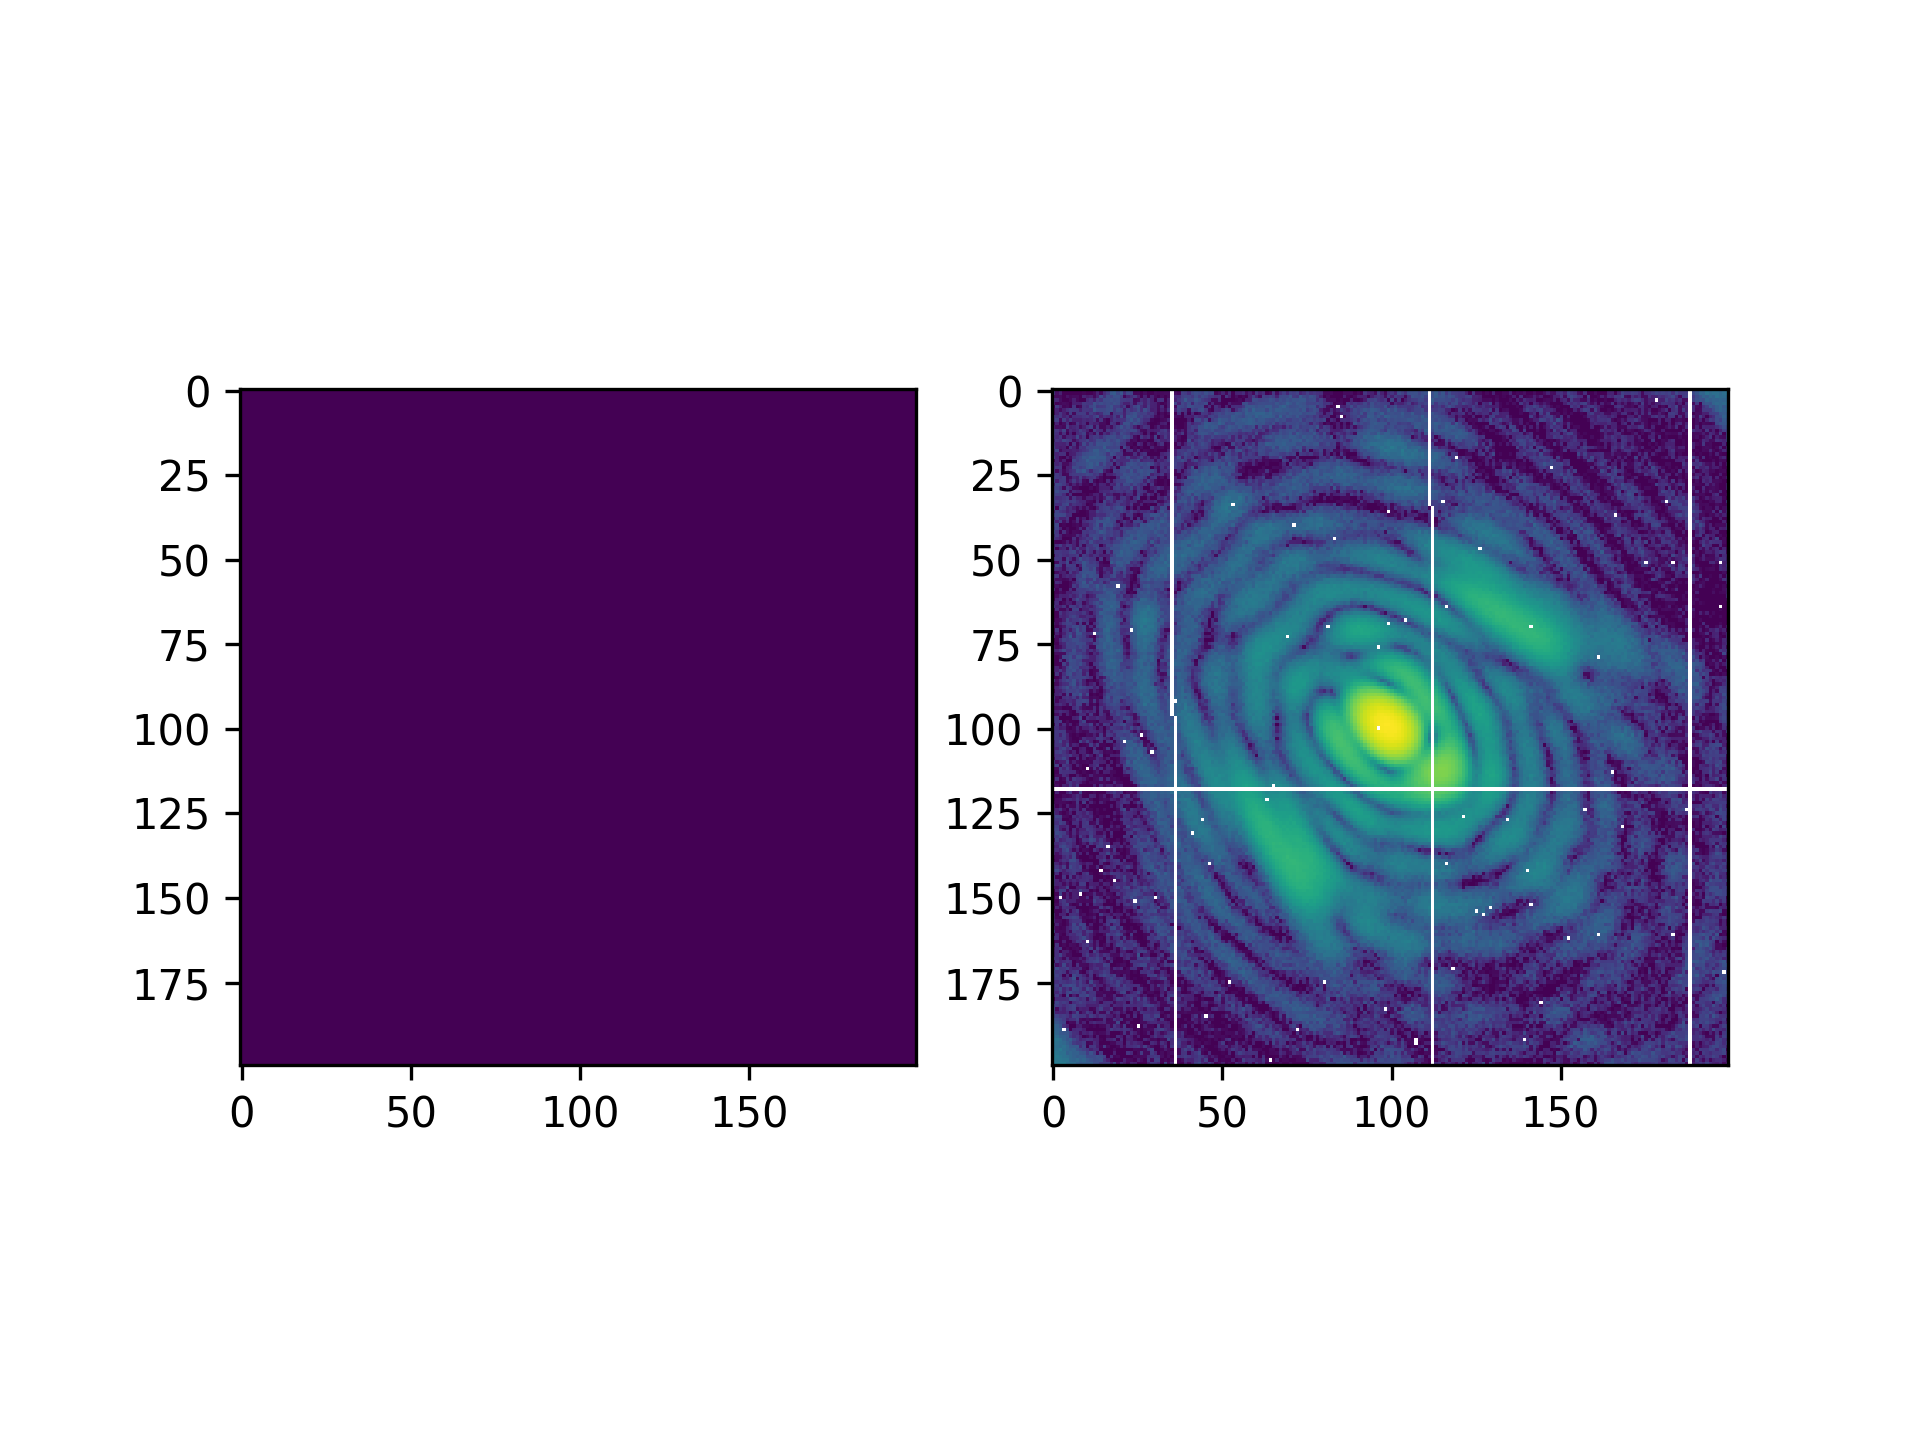

In [32]:
center = 1280
L = 100
diff2 = diff[center-L:center+L,center-L:center+L]
new2 = new[center-L:center+L,center-L:center+L]
old2 = old[center-L:center+L,center-L:center+L]
fig, ax = plt.subplots(1,2,dpi=300)
ax0, ax1= ax.ravel()
ax0.imshow(diff2)
# ax0.imshow(new2,norm=LogNorm())
ax1.imshow(old2,norm=LogNorm())